<a href="https://colab.research.google.com/github/leandropsouza1/pos-ia/blob/main/Regerss%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
dados = pd.read_excel('sample_data/Sorvete.xlsx')
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


Análise simples da distribuição das vendas pela temperatura, só para tentar entender um pouco os dados e ter uma idéia das informações

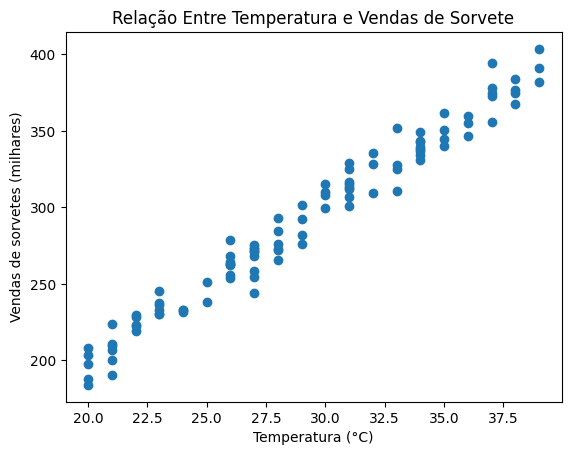

In [7]:
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de sorvetes (milhares)')
plt.title('Relação Entre Temperatura e Vendas de Sorvete')
plt.show()

Relação entre Temperatura X Vendas & Vendas X Temperaturas

In [8]:
dados.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


Dividindo os dados de treinamento e dados de testes
Estou separando 80% dos dados para treinamento e 20% para teste

In [12]:
x = dados[['Temperatura']]
y = dados['Vendas_Sorvetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Conferindo o tamanho do treinamento

In [13]:
x_train.shape

(80, 1)

Conferindo o tamanho do teste

In [14]:
x_test.shape

(20, 1)

In [17]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(x_test)

Avaliando os resultados ✅

Vamos avaliar o modelo com as seguintes métricas:

O RMSE é a raiz quadrada do MSE (Erro Quadrático Médio - Mean Squared Error). o MSE é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O MAE (Erro Médio Absoluto - Mean Absolute Error), onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O "R-squared (R2)" fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (coeficiente de determinação): 0.9594169633031285


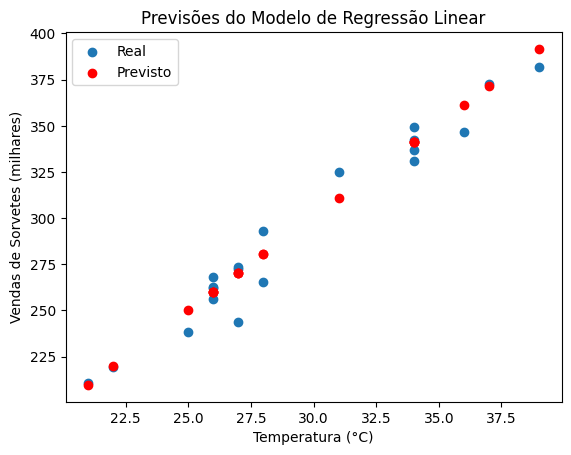

In [18]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes) #RMSE
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)  #MAE
r_quadrado = r2_score(y_test, previsoes)                      #R2

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(x_test, y_test, label='Real')
plt.scatter(x_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()